In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [4]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [6]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [7]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [9]:
# print(test_new.head())

In [11]:
multivariate_column_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0',
                           'RWWIHOA_MWT0','AEDAHO_T9_V2'] # choose column with which the following work will be conducted
univariate_column_label=['AEDAHO_T9_V2']
multivariate_data=test_new.iloc[500:24999][multivariate_column_label] #just for checking whether it is working or not

                     AEDATZ_HO_V0  AEWIHO_T9AV2  AEWIHOAVABV2  RWWIHOA_HWT0  \
dateTime                                                                      
2019-03-11 03:19:00     43.149994     86.615389     88.097301     95.998833   
2019-03-11 03:18:00     44.218947     87.266264     88.052587     96.018279   
2019-03-11 03:17:00     45.940449     87.113691     88.278552     95.957508   
2019-03-11 03:16:00     46.555631     86.055430     88.261385     96.038536   
2019-03-11 03:15:00     46.534541     81.659117     88.170360     96.103362   

                     AEWIHOAKZ_V0  AEDAHO_T9_V2  
dateTime                                         
2019-03-11 03:19:00     53.414579     76.768108  
2019-03-11 03:18:00     53.037212     79.963124  
2019-03-11 03:17:00     55.230932     83.279853  
2019-03-11 03:16:00     56.415287     84.380943  
2019-03-11 03:15:00     54.704687     84.314814  


In [12]:
multivariate_data=multivariate_data.loc[::-1]

In [19]:
print(multivariate_data.tail())

                     AEDATZ_HO_V0  AEWIHO_T9AV2  AEWIHOAVABV2  RWWIHOA_HWT0  \
dateTime                                                                      
2019-04-11 11:29:00     29.099978     64.576255     80.056771     91.314595   
2019-04-11 11:30:00     30.584083     64.560526     80.273953     91.070699   
2019-04-11 11:31:00     32.296527     64.542595     80.248003     91.087722   
2019-04-11 11:32:00     34.384378     64.795520     80.112264     91.007505   
2019-04-11 11:33:00     36.275050     64.671260     80.287128     91.094201   

                     AEWIHOAKZ_V0  AEDAHO_T9_V2  
dateTime                                         
2019-04-11 11:29:00           0.0     42.292350  
2019-04-11 11:30:00           0.0     42.108748  
2019-04-11 11:31:00           0.0     42.343193  
2019-04-11 11:32:00           0.0     42.480315  
2019-04-11 11:33:00           0.0     42.305187  


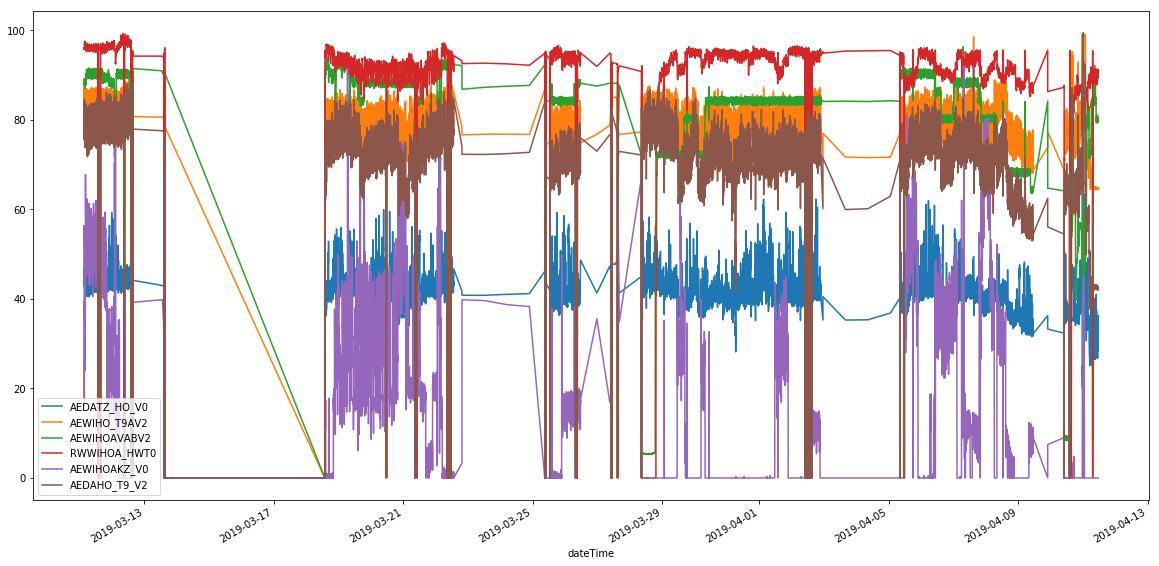

In [14]:
multivariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [15]:
# remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
multi_mean=multivariate_data.mean()
multivariate_data_mean= multivariate_data.replace(0,multi_mean)

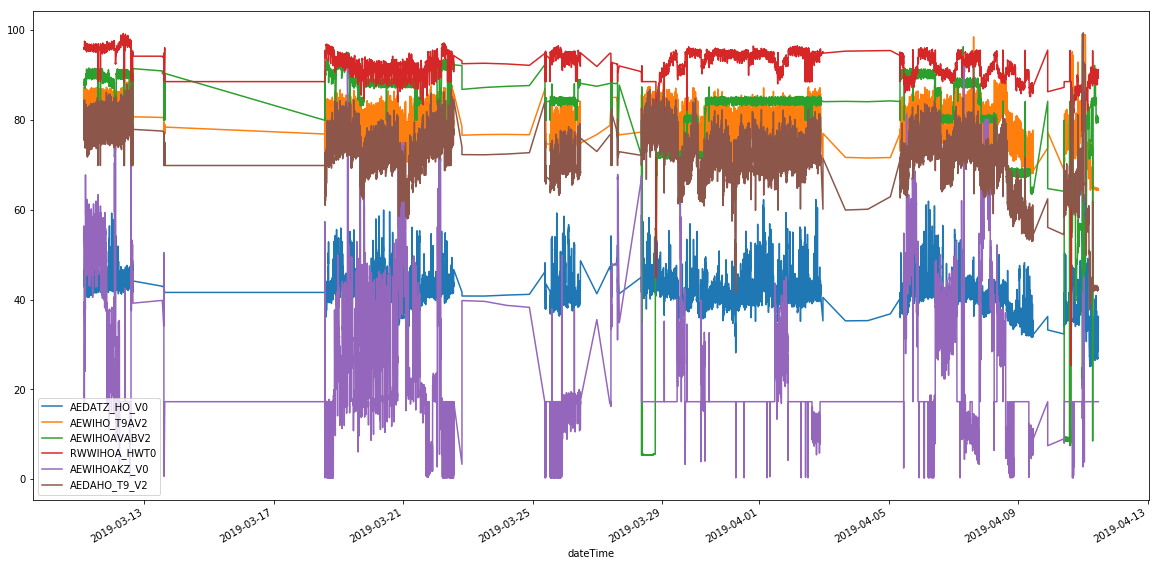

In [16]:
multivariate_data_mean.plot()
plt.show()

In [17]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(multivariate_data_mean)
# col_label=['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0','AEWIHOAKZ_V0','RWWIHOA_MWT0','AEDAHO_T9_V2']
df_normalized = pd.DataFrame(np_scaled,index=multivariate_data.index,columns=multivariate_column_label)

In [18]:
print(df_normalized.tail())

                     AEDATZ_HO_V0  AEWIHO_T9AV2  AEWIHOAVABV2  RWWIHOA_HWT0  \
dateTime                                                                      
2019-04-11 11:29:00      0.094191      0.057240      0.820900      0.891963   
2019-04-11 11:30:00      0.129098      0.056810      0.823288      0.888667   
2019-04-11 11:31:00      0.169376      0.056319      0.823003      0.888897   
2019-04-11 11:32:00      0.218484      0.063239      0.821510      0.887813   
2019-04-11 11:33:00      0.262954      0.059839      0.823433      0.888985   

                     AEWIHOAKZ_V0  AEDAHO_T9_V2  
dateTime                                         
2019-04-11 11:29:00      0.185198      0.073753  
2019-04-11 11:30:00      0.185198      0.070778  
2019-04-11 11:31:00      0.185198      0.074577  
2019-04-11 11:32:00      0.185198      0.076799  
2019-04-11 11:33:00      0.185198      0.073961  


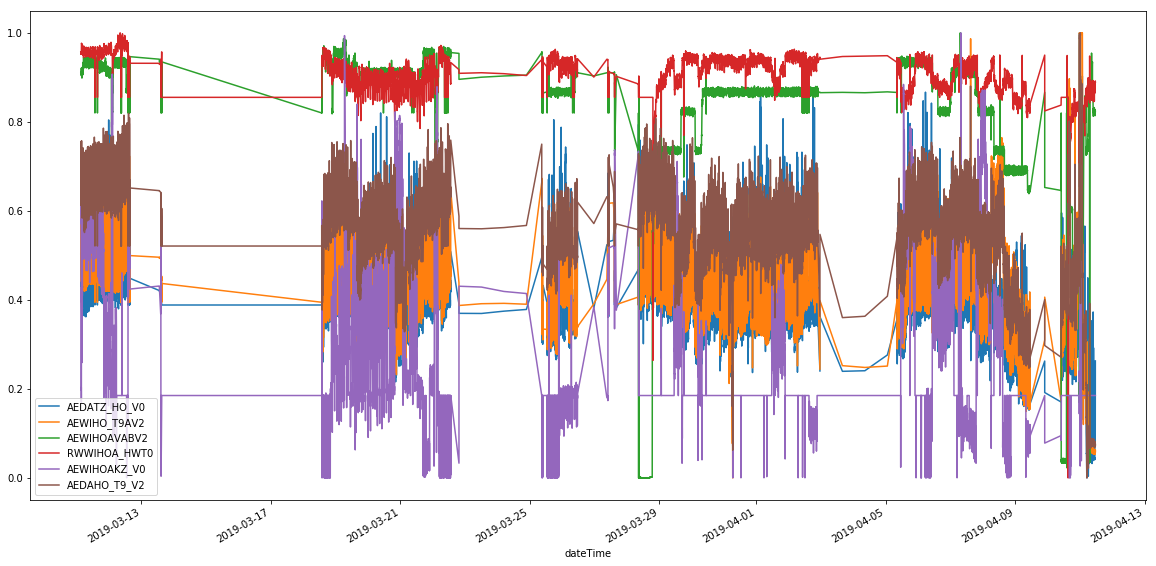

In [20]:
df_normalized.plot()
plt.show()

In [21]:
# dataset=np.array(multivariate_data_mean)
dataset=np.array(df_normalized)

NumberOfElements=int(len(dataset)*0.9)
print('dataset length: ',len(dataset))
print('Number of Elements for training: ',NumberOfElements)

multiple_ip_train_data=dataset[0:NumberOfElements]
print(multiple_ip_train_data.shape)
multiple_ip_test_set=dataset[NumberOfElements:len(dataset)]
print(multiple_ip_test_set.shape)

dataset length:  24499
Number of Elements for training:  22049
(22049, 6)
(2450, 6)
